# Анализ численности населения в городах

Наша задача: проанализировать имеющиеся данные и сделать выводы о социально-экономическом положении этих городов.

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns

In [2]:
# закачиваем и открываем датасет
cities = pd.read_csv(r"C:\Users\USER\Desktop\Программирование\Тестовые задания\CityDataTest.csv", sep=';')
display(cities.head(20))

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0
5,Белокуриха,2005,NaN,15200.0,14800.0,15500.0
6,Белокуриха,2006,NaN,15100.0,14700.0,15400.0
7,Белокуриха,2007,NaN,15000.0,14600.0,15300.0
8,Белокуриха,2008,14781.0,14900.0,14600.0,15200.0
9,Белокуриха,2009,14781.0,14800.0,14500.0,15100.0


Данные загрузились успешно. Пора их осмотреть.

In [3]:
# общие данные о датафрейме
display(cities.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30250 entries, 0 to 30249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Город            30250 non-null  object 
 1   year             30250 non-null  int64  
 2   fact             3250 non-null   float64
 3   Модель           30250 non-null  float64
 4   Нижняя граница   30250 non-null  float64
 5   Верхняя граница  30250 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


None

Данные в норме. Обращает на себя малое количество данных по фактическим значениям. Можно ждя экономии памяти привести виды, но впринципе это не обязательно. Интересно, какие именно города есть у нас в выборке и за какие годы.

In [4]:
# приводим типы данных
cities['Модель'] = cities['Модель'].astype('uint32')
cities['Нижняя граница'] = cities['Нижняя граница'].astype('uint32')
cities['Верхняя граница'] = cities['Верхняя граница'].astype('uint32')

In [5]:
# выводим уникальные названия городов
cities['Город'].sort_values().unique()

array([' Буй', ' Оха', ' Реж', ' Уфа', ' Шуя', 'Абаза', 'Агидель',
       'Алатырь', 'Александровск-Сахалинский', 'Алексин', 'Алзамай',
       'Алушта', 'Анадырь', 'Анапа', 'Ангарск', 'Арзамас', 'Архангельск',
       'Бабаево', 'Барабинск', 'Барыш', 'Белогорск', 'Белокуриха',
       'Березовский', 'Бирюч', 'Бобров', 'Бодайбо', 'Бокситогорск',
       'Болохово', 'Большой Камень', 'Бородино', 'Бузулук', 'Буйнакск',
       'Бутурлиновка', 'Великий Новгород', 'Верхний Тагил', 'Ветлуга',
       'Вихоревка', 'Волгодонск', 'Волгореченск', 'Волжск', 'Володарск',
       'Волхов', 'Воркута', 'Всеволожск', 'Вуктыл', 'Вытегра',
       'Гаврилов Посад', 'Глазов', 'Городец', 'Городовиковск',
       'Гороховец', 'Грязи', 'Губаха', 'Губкинский', 'Гудермес', 'Гусев',
       'Гусь-Хрустальный', 'Десногорск', 'Джанкой', 'Дзержинск', 'Дигора',
       'Дмитриев', 'Долинск', 'Евпатория', 'Егорьевск', 'Елец', 'Елизово',
       'Ессентуки', 'Ефремов', 'Железногорск', 'Жердевка', 'Завитинск',
       'Заволжск'

In [6]:
# выводим количество городов
cities.Город.nunique()

248

Городов достаточно много. Узнаем за какие годы у нас есть информация

In [7]:
cities.year.sort_values().unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054,
       2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065,
       2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076,
       2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087,
       2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098,
       2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109,
       2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120],
      dtype=int64)

У нас данные предсказаны почти на 100 лет вперёд! Неожиданно! И это по всем этим городам. Понятно, что таких фактических данных у нас быть не может.

In [8]:
# проверяем полные дубликаты
cities.duplicated().sum()

0

Дубликатов нет. Датасет чист. Города надо группировать по типам городов в зависимости от численности населения. До 50 тыс. человек - малые города. От 50 до 100 тыс. человек - средние, от 100 до 250 тыс. человек - большие города, от 250 до 500 тыс. человек - крупные города, от 500 до 1000 тыс. человек - крупнейшие города, и свыше 1000 тыс. человек - города - миллионники. Для этого заведём функцию.

In [9]:
# заводим функцию для сортировки
def group_cities(predict):
    if predict < 50000:
        return "Малый город"
    elif predict < 100000:
        return "Средний город"
    elif predict < 250000:
        return "Большой город"
    elif predict < 500000:
        return "Крупный город"
    elif predict < 1000000:
        return "Крупнейший город"
    else:
        return "Город - миллионник"
    
cities['category'] = cities['Модель'].apply(group_cities)
# проверим добавление столбца
cities.tail(30)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница,category
30220,Облучье,2091,NaN,700,400,1200,Малый город
30221,Облучье,2092,NaN,700,400,1200,Малый город
30222,Облучье,2093,NaN,600,400,1100,Малый город
30223,Облучье,2094,NaN,600,300,1100,Малый город
30224,Облучье,2095,NaN,600,300,1100,Малый город
30225,Облучье,2096,NaN,600,300,1100,Малый город
30226,Облучье,2097,NaN,500,300,1000,Малый город
30227,Облучье,2098,NaN,500,300,1000,Малый город
30228,Облучье,2099,NaN,500,200,1000,Малый город
30229,Облучье,2100,NaN,500,200,1000,Малый город


Столбец добавился успешно. Теперь надо посчитать количество городов разных типов с интервалом раз в 10 лет. Тогда можно будет понять динамику изменения численности городов.

In [17]:
cities_by_year = cities.query('year == 2000').groupby(['category', 'year'], as_index=False).agg({'Город': 'count', 'Модель': "mean", \
                                                                           'Нижняя граница': 'mean', 'Верхняя граница': 'mean'})
print("Города по состоянию на 2000 год.")
display(cities_by_year)
    
for year in range(2010, 2121, 10):
    city_year = cities.query('year == @year').groupby(['category', 'year'], as_index=False).agg({'Город': 'count', 'Модель': "mean", \
                                                                           'Нижняя граница': 'mean', 'Верхняя граница': 'mean'})
    cities_by_year = pd.concat([cities_by_year, city_year], ignore_index=True)
    print(f"Города по состоянию на {year} год.")
    display(city_year)

Города по состоянию на 2000 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2000,37,1.389865e+05,1.372378e+05,1.407757e+05
1,Город - миллионник,2000,1,9.702100e+06,9.649900e+06,9.754500e+06
2,Крупнейший город,2000,6,6.487500e+05,6.419167e+05,6.557167e+05
3,Крупный город,2000,10,3.759300e+05,3.732900e+05,3.786000e+05
4,Малый город,2000,158,2.261203e+04,2.214810e+04,2.323418e+04
5,Средний город,2000,38,6.537368e+04,6.469211e+04,6.605526e+04


Города по состоянию на 2010 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2010,33,1.380394e+05,1.365970e+05,1.395424e+05
1,Город - миллионник,2010,2,6.240300e+06,6.216850e+06,6.263850e+06
2,Крупнейший город,2010,8,6.124625e+05,6.069250e+05,6.180500e+05
3,Крупный город,2010,8,3.449250e+05,3.426375e+05,3.472125e+05
4,Малый город,2010,161,2.252609e+04,2.227888e+04,2.277640e+04
5,Средний город,2010,38,6.983421e+04,6.818684e+04,7.201316e+04


Города по состоянию на 2020 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2020,35,1.441514e+05,1.427257e+05,1.456286e+05
1,Город - миллионник,2020,3,4.926267e+06,4.908433e+06,4.944167e+06
2,Крупнейший город,2020,8,5.868000e+05,5.830000e+05,5.906500e+05
3,Крупный город,2020,6,3.524500e+05,3.505500e+05,3.544000e+05
4,Малый город,2020,162,2.155802e+04,2.122222e+04,2.204012e+04
5,Средний город,2020,36,6.859722e+04,6.783056e+04,6.938333e+04


Города по состоянию на 2030 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2030,28,1.525250e+05,1.511464e+05,1.539286e+05
1,Город - миллионник,2030,3,5.161000e+06,5.140100e+06,5.182033e+06
2,Крупнейший город,2030,7,5.920571e+05,5.875714e+05,5.966286e+05
3,Крупный город,2030,9,3.577111e+05,3.545222e+05,3.609556e+05
4,Малый город,2030,166,2.137651e+04,2.110663e+04,2.164819e+04
5,Средний город,2030,37,7.360541e+04,7.203784e+04,7.561892e+04


Города по состоянию на 2040 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2040,31,1.538452e+05,1.512871e+05,1.567161e+05
1,Город - миллионник,2040,3,5.271933e+06,5.247933e+06,5.296067e+06
2,Крупнейший город,2040,7,5.803571e+05,5.756143e+05,5.851286e+05
3,Крупный город,2040,9,3.763222e+05,3.726667e+05,3.800444e+05
4,Малый город,2040,167,2.063952e+04,2.035030e+04,2.093653e+04
5,Средний город,2040,33,7.005758e+04,6.908788e+04,7.106364e+04


Города по состоянию на 2050 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2050,30,1.543333e+05,1.517867e+05,1.572467e+05
1,Город - миллионник,2050,3,5.363133e+06,5.336100e+06,5.390367e+06
2,Крупнейший город,2050,8,5.663125e+05,5.607625e+05,5.719500e+05
3,Крупный город,2050,9,3.639222e+05,3.600889e+05,3.678111e+05
4,Малый город,2050,167,1.974371e+04,1.939820e+04,2.012156e+04
5,Средний город,2050,33,6.773030e+04,6.687273e+04,6.860303e+04


Города по состоянию на 2060 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2060,28,1.492286e+05,1.467786e+05,1.521107e+05
1,Город - миллионник,2060,2,7.725650e+06,7.683700e+06,7.767850e+06
2,Крупнейший город,2060,9,6.246000e+05,6.185556e+05,6.307111e+05
3,Крупный город,2060,11,3.523273e+05,3.478545e+05,3.568727e+05
4,Малый город,2060,169,1.905030e+04,1.867988e+04,1.945503e+04
5,Средний город,2060,31,6.888387e+04,6.795161e+04,6.984194e+04


Города по состоянию на 2070 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2070,24,1.595625e+05,1.580667e+05,1.610833e+05
1,Город - миллионник,2070,2,7.915450e+06,7.869550e+06,7.961600e+06
2,Крупнейший город,2070,10,6.222100e+05,6.156900e+05,6.288200e+05
3,Крупный город,2070,11,3.467727e+05,3.390364e+05,3.552091e+05
4,Малый город,2070,168,1.785595e+04,1.746548e+04,1.830595e+04
5,Средний город,2070,35,7.154857e+04,7.059429e+04,7.252571e+04


Города по состоянию на 2080 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2080,23,1.599783e+05,1.584261e+05,1.615522e+05
1,Город - миллионник,2080,2,8.093800e+06,8.043950e+06,8.143900e+06
2,Крупнейший город,2080,11,6.461909e+05,6.350091e+05,6.577545e+05
3,Крупный город,2080,11,3.499091e+05,3.459364e+05,3.539364e+05
4,Малый город,2080,168,1.685060e+04,1.645060e+04,1.734167e+04
5,Средний город,2080,35,7.250571e+04,7.151143e+04,7.351429e+04


Города по состоянию на 2090 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2090,23,1.647304e+05,1.631478e+05,1.663391e+05
1,Город - миллионник,2090,3,5.840933e+06,5.790833e+06,5.891933e+06
2,Крупнейший город,2090,9,7.154111e+05,7.060889e+05,7.248778e+05
3,Крупный город,2090,12,3.610333e+05,3.568167e+05,3.653417e+05
4,Малый город,2090,169,1.624911e+04,1.584379e+04,1.676864e+04
5,Средний город,2090,34,7.382941e+04,7.268824e+04,7.498824e+04


Города по состоянию на 2100 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2100,25,1.694880e+05,1.678200e+05,1.711640e+05
1,Город - миллионник,2100,5,4.081760e+06,4.044220e+06,4.119840e+06
2,Крупнейший город,2100,8,6.557000e+05,6.470875e+05,6.644125e+05
3,Крупный город,2100,10,3.540800e+05,3.495300e+05,3.587200e+05
4,Малый город,2100,170,1.584235e+04,1.543941e+04,1.639176e+04
5,Средний город,2100,32,7.427500e+04,7.304375e+04,7.555938e+04


Города по состоянию на 2110 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2110,28,1.752571e+05,1.733750e+05,1.771714e+05
1,Город - миллионник,2110,6,3.717450e+06,3.682033e+06,3.753317e+06
2,Крупнейший город,2110,8,6.214375e+05,6.130000e+05,6.300000e+05
3,Крупный город,2110,7,3.549429e+05,3.501857e+05,3.597571e+05
4,Малый город,2110,172,1.575000e+04,1.533023e+04,1.633837e+04
5,Средний город,2110,29,7.564138e+04,7.431379e+04,7.702069e+04


Города по состоянию на 2120 год.


,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2120,28,1.770000e+05,1.750000e+05,1.790286e+05
1,Город - миллионник,2120,6,3.857800e+06,3.820383e+06,3.895600e+06
2,Крупнейший город,2120,8,6.329375e+05,6.240750e+05,6.419375e+05
3,Крупный город,2120,7,3.500857e+05,3.451143e+05,3.552143e+05
4,Малый город,2120,170,1.497412e+04,1.453176e+04,1.558412e+04
5,Средний город,2120,31,7.453548e+04,7.316774e+04,7.593871e+04


Вид пока что не наглядный, но уловить общие изменения можно: идёт укрупнение городов, даже за счёт количества самих городов. Также легко понять самую страдающую категорию: наиболее мелкие города. Они буквально умирают. Для наглядности надо сделать эти  таблицы и отрисовать графики в разрезе разделов городов. И сделаем это в порядке увеличения городов, начиная с малых.

In [19]:
# информация по малым городам
cities_by_year.loc[cities_by_year.category == 'Малый город']

,category,year,Город,Модель,Нижняя граница,Верхняя граница
4,Малый город,2000,158,22612.025316,22148.101266,23234.177215
10,Малый город,2010,161,22526.086957,22278.881988,22776.397516
16,Малый город,2020,162,21558.024691,21222.222222,22040.123457
22,Малый город,2030,166,21376.506024,21106.626506,21648.192771
28,Малый город,2040,167,20639.520958,20350.299401,20936.526946
34,Малый город,2050,167,19743.712575,19398.203593,20121.556886
40,Малый город,2060,169,19050.295858,18679.881657,19455.029586
46,Малый город,2070,168,17855.952381,17465.476190,18305.952381
52,Малый город,2080,168,16850.595238,16450.595238,17341.666667
58,Малый город,2090,169,16249.112426,15843.786982,16768.639053


Теперь информация по малым городам наглядна. Тенденция к сокращению численности малых городов на лицо. Если ничего не менять - то ещё через 100 - 200 лет могут умереть как класс.

In [20]:
# информация по средним городам
cities_by_year.loc[cities_by_year.category == 'Средний город']

,category,year,Город,Модель,Нижняя граница,Верхняя граница
5,Средний город,2000,38,65373.684211,64692.105263,66055.263158
11,Средний город,2010,38,69834.210526,68186.842105,72013.157895
17,Средний город,2020,36,68597.222222,67830.555556,69383.333333
23,Средний город,2030,37,73605.405405,72037.837838,75618.918919
29,Средний город,2040,33,70057.575758,69087.878788,71063.636364
35,Средний город,2050,33,67730.303030,66872.727273,68603.030303
41,Средний город,2060,31,68883.870968,67951.612903,69841.935484
47,Средний город,2070,35,71548.571429,70594.285714,72525.714286
53,Средний город,2080,35,72505.714286,71511.428571,73514.285714
59,Средний город,2090,34,73829.411765,72688.235294,74988.235294


По средним городам тенденция такова: несмотря на некоторое уменьшение количества таких городов, намечается некоторое укрупнение этих городов. Возможен переход части этих городов в большие города.

In [21]:
# информация по большим городам
cities_by_year.loc[cities_by_year.category == 'Большой город']

,category,year,Город,Модель,Нижняя граница,Верхняя граница
0,Большой город,2000,37,138986.486486,137237.837838,140775.675676
6,Большой город,2010,33,138039.393939,136596.969697,139542.424242
12,Большой город,2020,35,144151.428571,142725.714286,145628.571429
18,Большой город,2030,28,152525.000000,151146.428571,153928.571429
24,Большой город,2040,31,153845.161290,151287.096774,156716.129032
30,Большой город,2050,30,154333.333333,151786.666667,157246.666667
36,Большой город,2060,28,149228.571429,146778.571429,152110.714286
42,Большой город,2070,24,159562.500000,158066.666667,161083.333333
48,Большой город,2080,23,159978.260870,158426.086957,161552.173913
54,Большой город,2090,23,164730.434783,163147.826087,166339.130435


Ситуатация с большими городами аналогична ситуации со средними. Тенденция к уменьшению количества городов и одновременно к укрупнению оставшихся городов.

In [23]:
# информация по крупным городам
cities_by_year.query('category == "Крупный город"')

,category,year,Город,Модель,Нижняя граница,Верхняя граница
3,Крупный город,2000,10,375930.000000,373290.000000,378600.000000
9,Крупный город,2010,8,344925.000000,342637.500000,347212.500000
15,Крупный город,2020,6,352450.000000,350550.000000,354400.000000
21,Крупный город,2030,9,357711.111111,354522.222222,360955.555556
27,Крупный город,2040,9,376322.222222,372666.666667,380044.444444
33,Крупный город,2050,9,363922.222222,360088.888889,367811.111111
39,Крупный город,2060,11,352327.272727,347854.545455,356872.727273
45,Крупный город,2070,11,346772.727273,339036.363636,355209.090909
51,Крупный город,2080,11,349909.090909,345936.363636,353936.363636
57,Крупный город,2090,12,361033.333333,356816.666667,365341.666667


Крупных городов по мнению модели станет немного меньше и средняя численность немного понизиться. Но есть предположение, что  это может быть связано с увеличением количества крупнейших городов и городов - миллионников. Это несложно проверить. этим и займёмся.

In [24]:
# информация по крупнейшим городам
cities_by_year.query('category == "Крупнейший город"')

,category,year,Город,Модель,Нижняя граница,Верхняя граница
2,Крупнейший город,2000,6,648750.000000,641916.666667,655716.666667
8,Крупнейший город,2010,8,612462.500000,606925.000000,618050.000000
14,Крупнейший город,2020,8,586800.000000,583000.000000,590650.000000
20,Крупнейший город,2030,7,592057.142857,587571.428571,596628.571429
26,Крупнейший город,2040,7,580357.142857,575614.285714,585128.571429
32,Крупнейший город,2050,8,566312.500000,560762.500000,571950.000000
38,Крупнейший город,2060,9,624600.000000,618555.555556,630711.111111
44,Крупнейший город,2070,10,622210.000000,615690.000000,628820.000000
50,Крупнейший город,2080,11,646190.909091,635009.090909,657754.545455
56,Крупнейший город,2090,9,715411.111111,706088.888889,724877.777778


И здесь  модель предсказывает, что будет происходить некоторое укрупнение этих городов при почти неизменной их численности. 

In [26]:
# информация по городам - миллионникам
cities_by_year.query('category == "Город - миллионник"')

,category,year,Город,Модель,Нижняя граница,Верхняя граница
1,Город - миллионник,2000,1,9.702100e+06,9.649900e+06,9.754500e+06
7,Город - миллионник,2010,2,6.240300e+06,6.216850e+06,6.263850e+06
13,Город - миллионник,2020,3,4.926267e+06,4.908433e+06,4.944167e+06
19,Город - миллионник,2030,3,5.161000e+06,5.140100e+06,5.182033e+06
25,Город - миллионник,2040,3,5.271933e+06,5.247933e+06,5.296067e+06
31,Город - миллионник,2050,3,5.363133e+06,5.336100e+06,5.390367e+06
37,Город - миллионник,2060,2,7.725650e+06,7.683700e+06,7.767850e+06
43,Город - миллионник,2070,2,7.915450e+06,7.869550e+06,7.961600e+06
49,Город - миллионник,2080,2,8.093800e+06,8.043950e+06,8.143900e+06
55,Город - миллионник,2090,3,5.840933e+06,5.790833e+06,5.891933e+06


И, наконец, города - миллионники показывают большой рост количества таких городов. Средняя численность населения на 1 город будет падает из-за большого роста количества таких городов. Для наглядности отрисуем графики по этим городам.

count    2.500000e+02
mean     1.308251e+05
std      8.101084e+05
min      2.899000e+03
5%       6.963400e+03
25%      1.533250e+04
50%      3.262700e+04
75%      7.381550e+04
80%      1.022892e+05
90%      1.688539e+05
95%      3.823093e+05
max      1.267808e+07
Name: fact, dtype: float64


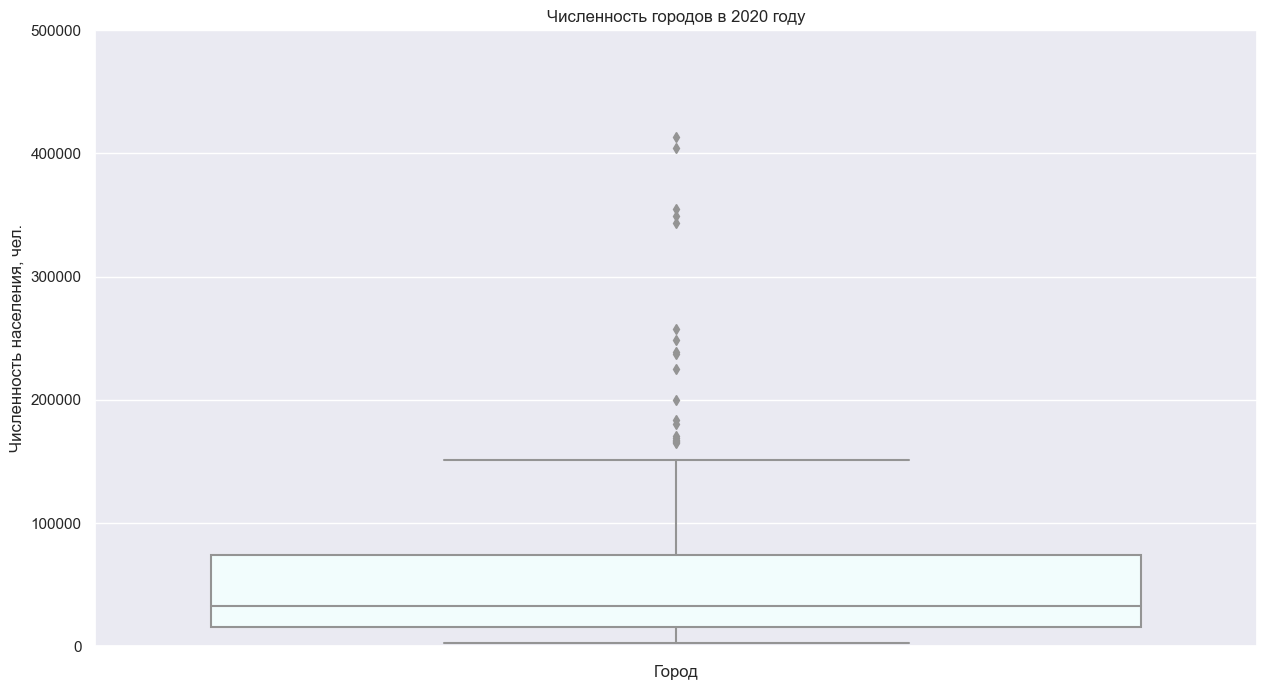

In [37]:
sns.set(rc={'figure.figsize': (15, 8)})
# возьмём 2020 год и фактическую численность населения - выведем статистику и график ящик с усами для наглядности.
print(cities.query('year == 2020').fact.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95]))
ax = sns.boxplot(y=cities.query('year == 2020').fact, color='azure')
ax.set_ylim(0, 5e+05)
ax.set(title='Численность городов в 2020 году', xlabel='Город', ylabel='Численность населения, чел.');

Фактических данных свежее 2020 года у нас нет. Как наглядно видно из данных - в выборке у нас почти все города - или маленькие или средние. Крупных городов мало. А миллионник только один - Москва. Конечно, данная выборка не охватывает все тенденции. Пока что отметим данные фактической выборки за 2020 год. Средний размер города - немногим более 130, 5 тыс. человек., медиана намного ниже - немногим более 32, 5 тысяч человек. Говорит о наличии в выборке резко больших городов или города (в данном случае Москвы). Более 100 тыс. человек в городе встречается немногим чаще, чем в 20% случаев. Свыше 250 тысяч человек - менее чем в 10% случаев. Теперь интерсно посмотреть прогнозные выборки с интервалом раз в 20 лет. Ибо социальные процессы идут не быстро. А 20 лет это одно поколение. 

count    2.500000e+02
mean     1.351724e+05
std      8.638858e+05
min      5.000000e+02
5%       5.000000e+03
25%      1.412500e+04
50%      3.035000e+04
75%      7.500000e+04
80%      9.468000e+04
90%      1.937400e+05
95%      4.064350e+05
max      1.352930e+07
Name: Модель, dtype: float64


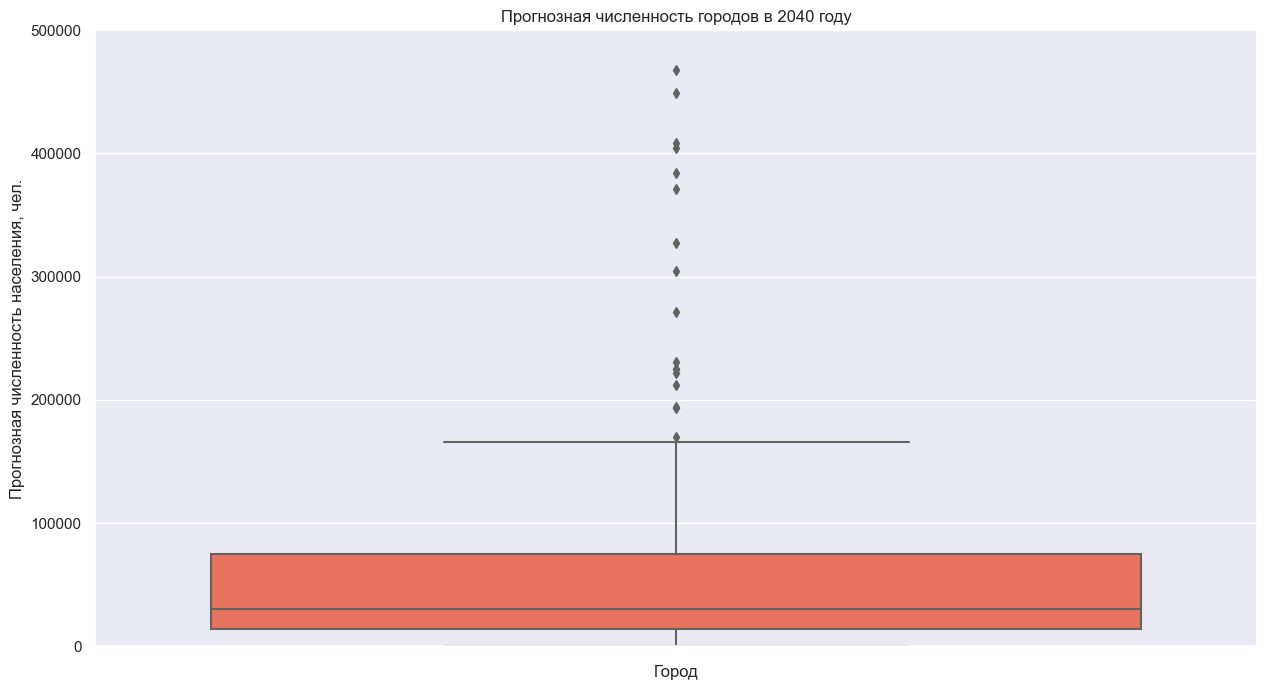

In [38]:
# возьмём 2040 год и прогнозную численность населения - выведем статистику и график ящик с усами для наглядности.
print(cities.query('year == 2040').Модель.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95]))
ax = sns.boxplot(y=cities.query('year == 2040').Модель, color='tomato')
ax.set_ylim(0, 5e+05)
ax.set(title='Прогнозная численность городов в 2040 году', xlabel='Город', ylabel='Прогнозная численность населения, чел.');

Уже через 20 лет начинаеют сбываться прогнозы. Происходит укрупнение крупных городов и уменьшение мелких городов при общем увеличении количества человек проживающих в них. Средняя прогнозная численность в городе - 135 тысяч человек, а вот медиана упала до 30 тысяч человек.

count    2.500000e+02
mean     1.379264e+05
std      8.991011e+05
min      1.000000e+02
5%       2.800000e+03
25%      1.132500e+04
50%      2.850000e+04
75%      7.137500e+04
80%      9.864000e+04
90%      1.946600e+05
95%      4.329150e+05
max      1.407830e+07
Name: Модель, dtype: float64


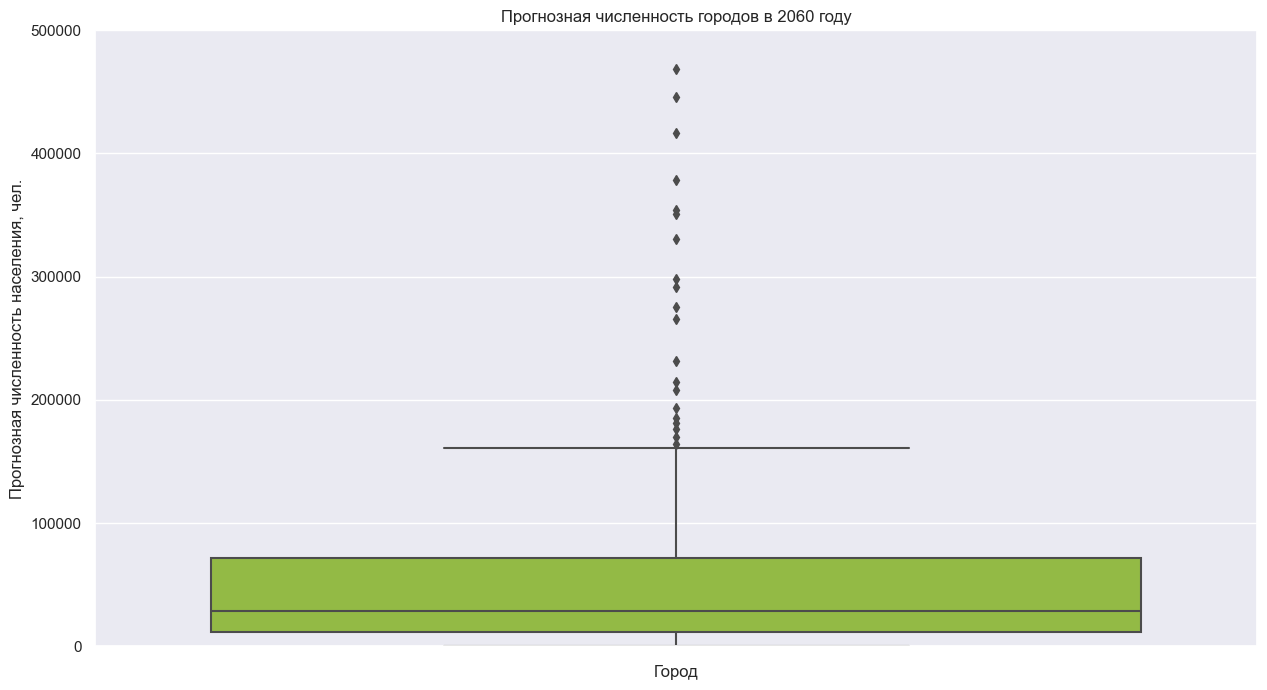

In [40]:
# возьмём 2060 год и прогнозную численность населения - выведем статистику и график ящик с усами для наглядности.
print(cities.query('year == 2060').Модель.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95]))
ax = sns.boxplot(y=cities.query('year == 2060').Модель, color='yellowgreen')
ax.set_ylim(0, 5e+05)
ax.set(title='Прогнозная численность городов в 2060 году', xlabel='Город', ylabel='Прогнозная численность населения, чел.');

В 2060 году продолжение тенденция продолжается.Увеличение самых крупных городов и уменьшение мелких при общем росте количества людей в этих городах. Средняя прогнозная численность в городе - почти 138 тысяч человек, а вот медиана упала до 28,5 тысяч человек.

count    2.500000e+02
mean     1.447712e+05
std      9.366854e+05
min      0.000000e+00
5%       1.445000e+03
25%      1.022500e+04
50%      2.615000e+04
75%      7.070000e+04
80%      9.426000e+04
90%      2.084700e+05
95%      5.041000e+05
max      1.463700e+07
Name: Модель, dtype: float64


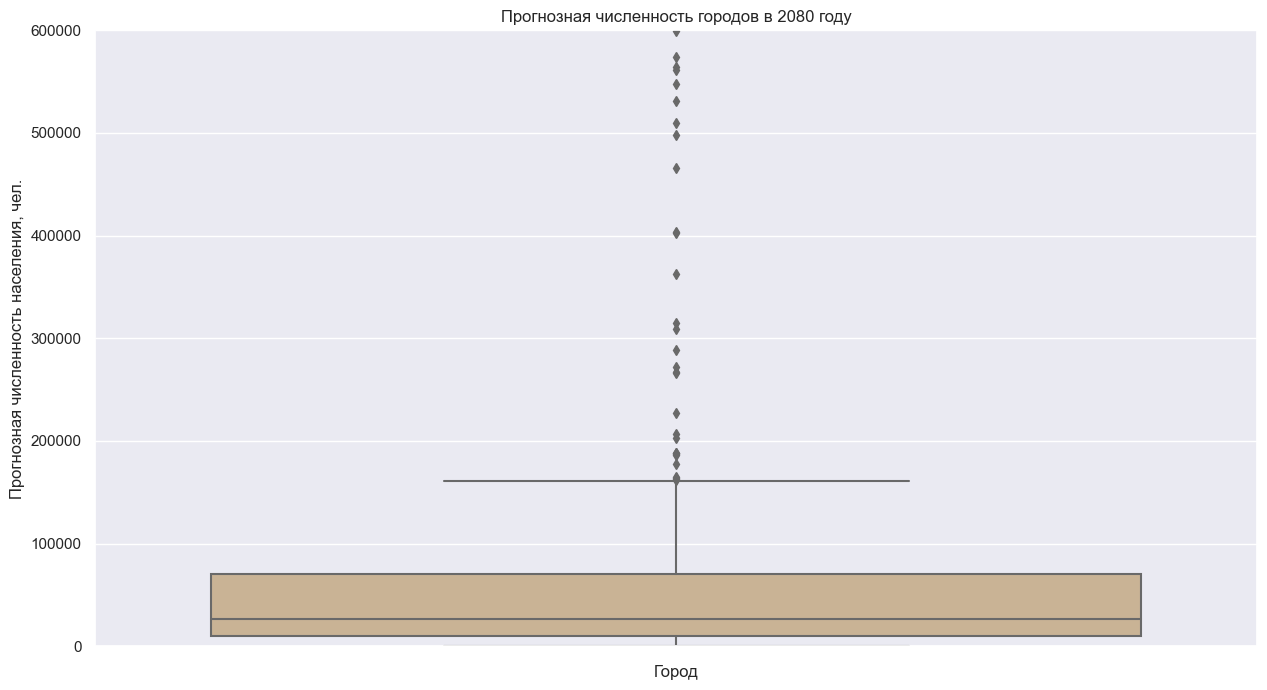

In [42]:
# возьмём 2080 год и прогнозную численность населения - выведем статистику и график ящик с усами для наглядности.
print(cities.query('year == 2080').Модель.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95]))
ax = sns.boxplot(y=cities.query('year == 2080').Модель, color='tan')
ax.set_ylim(0, 6e+05)
ax.set(title='Прогнозная численность городов в 2080 году', xlabel='Город', ylabel='Прогнозная численность населения, чел.');

count    2.500000e+02
mean     1.540096e+05
std      9.714623e+05
min      0.000000e+00
5%       6.450000e+02
25%      8.325000e+03
50%      2.375000e+04
75%      7.547500e+04
80%      9.636000e+04
90%      2.211900e+05
95%      5.148200e+05
max      1.508660e+07
Name: Модель, dtype: float64


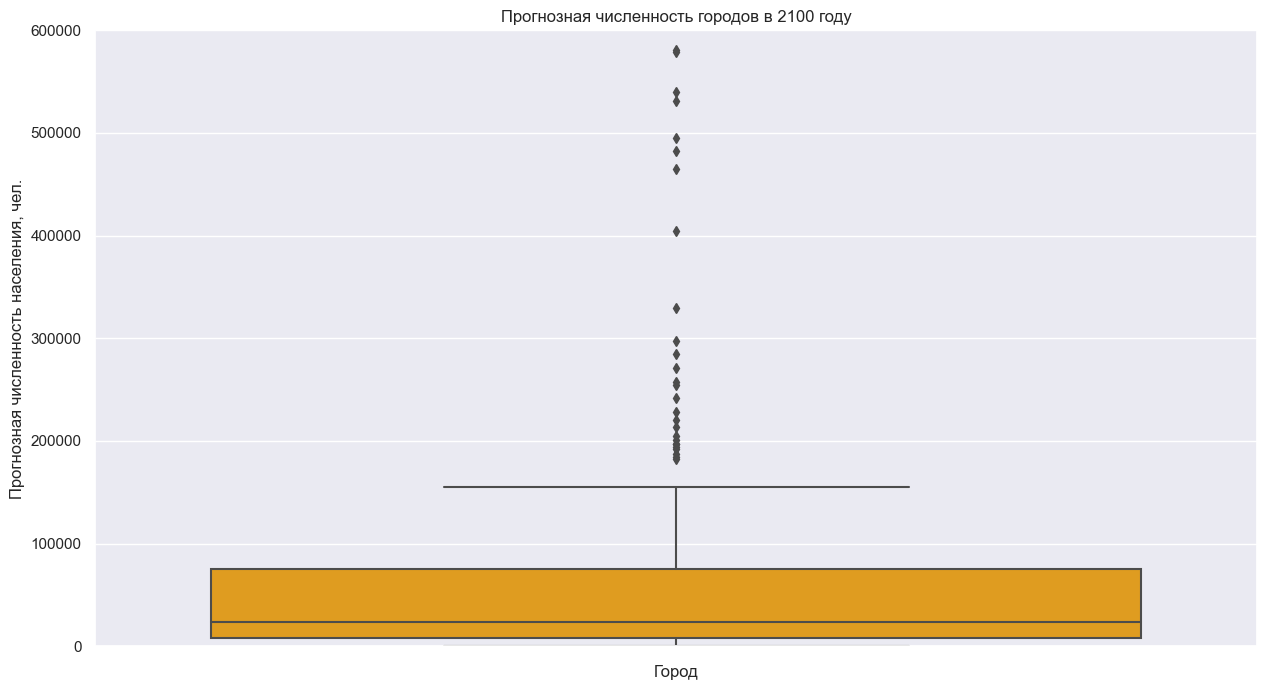

In [43]:
# возьмём 2100 год и прогнозную численность населения - выведем статистику и график ящик с усами для наглядности.
print(cities.query('year == 2100').Модель.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95]))
ax = sns.boxplot(y=cities.query('year == 2100').Модель, color='orange')
ax.set_ylim(0, 6e+05)
ax.set(title='Прогнозная численность городов в 2100 году', xlabel='Город', ylabel='Прогнозная численность населения, чел.');

count    2.500000e+02
mean     1.618924e+05
std      1.001582e+06
min      0.000000e+00
5%       5.000000e+02
25%      7.250000e+03
50%      2.225000e+04
75%      7.837500e+04
80%      9.918000e+04
90%      2.266000e+05
95%      5.342100e+05
max      1.541940e+07
Name: Модель, dtype: float64


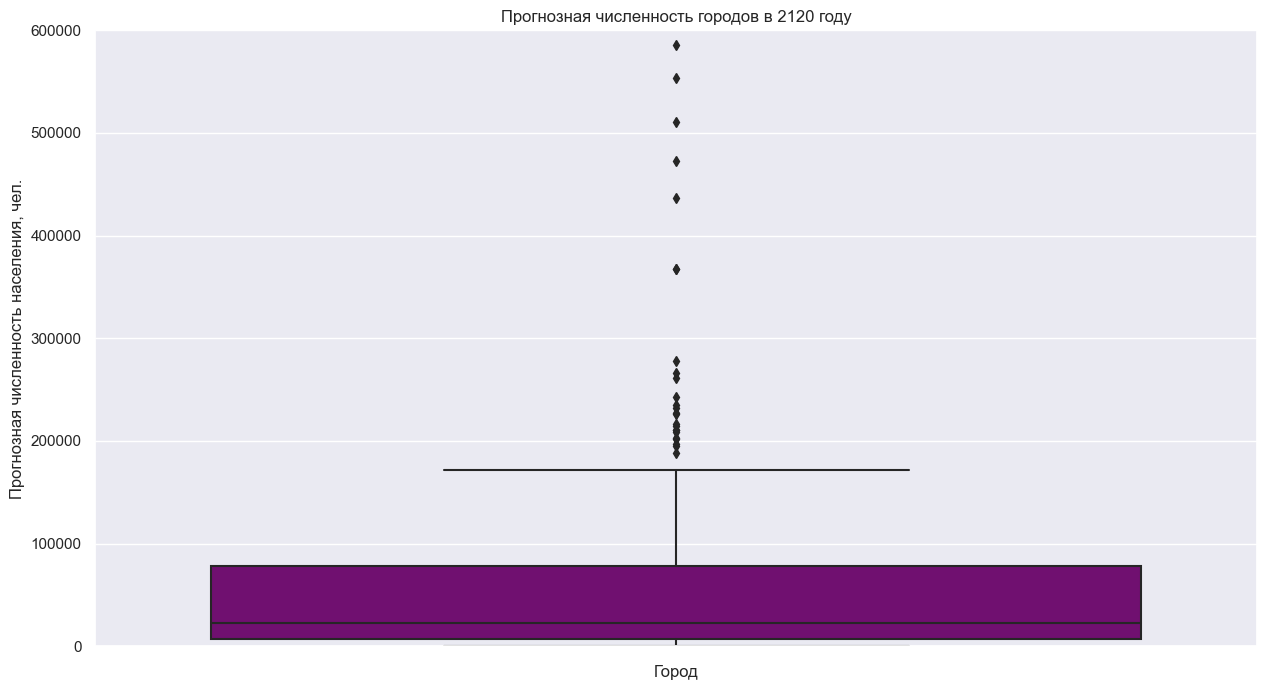

In [44]:
# возьмём 2120 год и прогнозную численность населения - выведем статистику и график ящик с усами для наглядности.
print(cities.query('year == 2120').Модель.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95]))
ax = sns.boxplot(y=cities.query('year == 2120').Модель, color='purple')
ax.set_ylim(0, 6e+05)
ax.set(title='Прогнозная численность городов в 2120 году', xlabel='Город', ylabel='Прогнозная численность населения, чел.');

По прогнозам модели к 2120 году  маленькие города станут мельче и имеют тенденцию к вымиранию, а крупные станут ещё крупнее. Средняя прогнозная численность в городе к 2120 достигнет почти 162 тысяч человек, а вот медиана упадёт ниже 22,5 тысяч человек.
Это означает увеличение численности крупнейшей четверти городов за счёт всех остальных трёх четвертей городов.

Теперь вопрос к чему это может привести? Может быть ухудшение контроля за территорией в целом. Заброшенность городов и сёл. Также это приведёт к увеличению плотности начеления в крупнейших городах и разрастанию самих крупнейших городов. 

Социально - экономической предпосылкой таких изменений может быть наличие работы с достойным уровнем заработной платы в крупных городах по сравнению с более мелкими. Также наличие мест досуга в более крупных городах. И даже вероятность встретить себе вторую половинку выше булет именно в крупных городах. Но это же может иметь и отрицательные стороны: отсутсвие возможности добраться до места работы / учёбы за небольшое время (из-за расстояний в больших городах).

Вероятно, если столкнуться с ситуацией планомерного оттока населения с точки зрения управления городом надо думать будет прежде всего о наличии мест с достойной зарплатой (по меркам более крупных городов) и одновременно о создании новых мест труда (с использованием ремёсел или других методов - пока не так важно). Также организацией досуга начеления в таком городе(или в таких городах). Также мест куда можно сходить с детьми. И только при соблюдении этих условий можно думать о возможности изменнения сложившейся ситуации (тренда). Но это не возможно без более - менее равномерного распределения денежной массы в целом по стране.

В качестве дальнейшего использования можно постараться добавить данные о заработной плте в этих городах (в целом и с разбивкой по профессиям) и посмотреть как эо влияет на отток населения с города или наоборот на его укрупнение. Там могут обнаружиться новые зависимости, которые уже будет проще перенести на реальную обставновку.